In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read csv data
df=pd.read_csv("spotify_dataset.csv")
df.head(5)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [4]:
#clean data- genres
df['Genre']=df['Genre'].astype(str)
df["Genre"][df["Genre"] == "[]"] = np.nan
df["Genre"] = df["Genre"].fillna(0)
#here we get rid of useless symbols to be able to separate genres
df.Genre=df.Genre.str.replace("[", "")
df.Genre=df.Genre.str.replace("]", "")
df.Genre=df.Genre.str.replace("'", "")
#now we devide genre strings by comma
df["Genre"] = df["Genre"].str.split(",")
#next command separates rows based on genres, so for each song that is marked with several genres, 
#now we'll have multiple rows with one genre for each row
df=df.explode('Genre')

df

<ipython-input-4-9694367c7abf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"][df["Genre"] == "[]"] = np.nan
<ipython-input-4-9694367c7abf>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Genre=df.Genre.str.replace("[", "")
<ipython-input-4-9694367c7abf>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Genre=df.Genre.str.replace("]", "")


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,post-teen pop,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,brega funk,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,funk carioca,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,pop,...,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


In [5]:
#clean data- remove irrelavant columns
clean_spotify = df.drop(columns = ['Index','Week of Highest Charting','Song ID','Weeks Charted','Chord'],axis=1)
clean_spotify.head(10)

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',"48,633,449",Måneskin,3377762,indie rock italiano,2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
0,1,8,Beggin',"48,633,449",Måneskin,3377762,italian pop,2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,australian hip hop,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514,pop,2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380,pop,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
3,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380,uk pop,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,lgbtq+ hip hop,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
4,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,pop rap,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
5,1,18,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,lgbtq+ hip hop,2021-03-31,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758
5,1,18,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,pop rap,2021-03-31,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758


In [6]:
#Converting object columns to relevant float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']

In [7]:
for each_col in object_cols:
    clean_spotify[each_col] = pd.to_numeric(clean_spotify[each_col], errors='coerce')

clean_spotify.isnull().sum()
clean_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4665 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  4665 non-null   int64  
 1   Number of Times Charted    4665 non-null   int64  
 2   Song Name                  4665 non-null   object 
 3   Streams                    4665 non-null   object 
 4   Artist                     4665 non-null   object 
 5   Artist Followers           4654 non-null   float64
 6   Genre                      4590 non-null   object 
 7   Release Date               4665 non-null   object 
 8   Popularity                 4654 non-null   float64
 9   Danceability               4654 non-null   float64
 10  Energy                     4654 non-null   float64
 11  Loudness                   4654 non-null   float64
 12  Speechiness                4654 non-null   float64
 13  Acousticness               4654 non-null   float

In [8]:
def commas_to_number(strnum):
    strlist = str(strnum).split(',')
    strjoined = ""
    for each_literal in strlist:
        strjoined += each_literal
    return (int(strjoined))

clean_spotify['Streams'] = clean_spotify['Streams'].apply(commas_to_number)

clean_spotify['Streams'].head(10)

0    48633449
0    48633449
1    47248719
2    40162559
3    37799456
3    37799456
4    33948454
4    33948454
5    30071134
5    30071134
Name: Streams, dtype: int64

In [9]:
# drop null
clean_spotify = clean_spotify.dropna()
clean_spotify.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,4579.000000,4579.000000,4.579000e+03,4.579000e+03,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000,4579.000000
mean,90.111160,10.533523,6.258549e+06,1.522149e+07,71.704739,0.696328,0.639763,-6.229878,0.124249,0.231429,0.187330,122.286322,200639.476305,0.515857
std,57.660314,15.910035,3.007284e+06,1.659029e+07,10.569382,0.141280,0.157905,2.389524,0.108623,0.239455,0.148483,29.520286,45240.475360,0.225642
min,1.000000,1.000000,4.176083e+06,4.883000e+03,29.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,41.000000,1.000000,4.901559e+06,3.198705e+06,65.000000,0.610500,0.538000,-7.385000,0.045700,0.046400,0.097600,97.030500,173792.500000,0.345000
50%,84.000000,4.000000,5.245618e+06,7.816213e+06,73.000000,0.716000,0.645000,-5.893000,0.077700,0.144000,0.126000,120.998000,196946.000000,0.512000
75%,139.000000,12.000000,6.469500e+06,2.217098e+07,79.000000,0.801000,0.758000,-4.629500,0.170000,0.344000,0.231000,142.948000,220886.500000,0.692000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


In [10]:
clean_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4579 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  4579 non-null   int64  
 1   Number of Times Charted    4579 non-null   int64  
 2   Song Name                  4579 non-null   object 
 3   Streams                    4579 non-null   int64  
 4   Artist                     4579 non-null   object 
 5   Artist Followers           4579 non-null   float64
 6   Genre                      4579 non-null   object 
 7   Release Date               4579 non-null   object 
 8   Popularity                 4579 non-null   float64
 9   Danceability               4579 non-null   float64
 10  Energy                     4579 non-null   float64
 11  Loudness                   4579 non-null   float64
 12  Speechiness                4579 non-null   float64
 13  Acousticness               4579 non-null   float

<AxesSubplot:title={'center':'Top 10 Streamed Genres'}, xlabel='Genre', ylabel='Streams'>

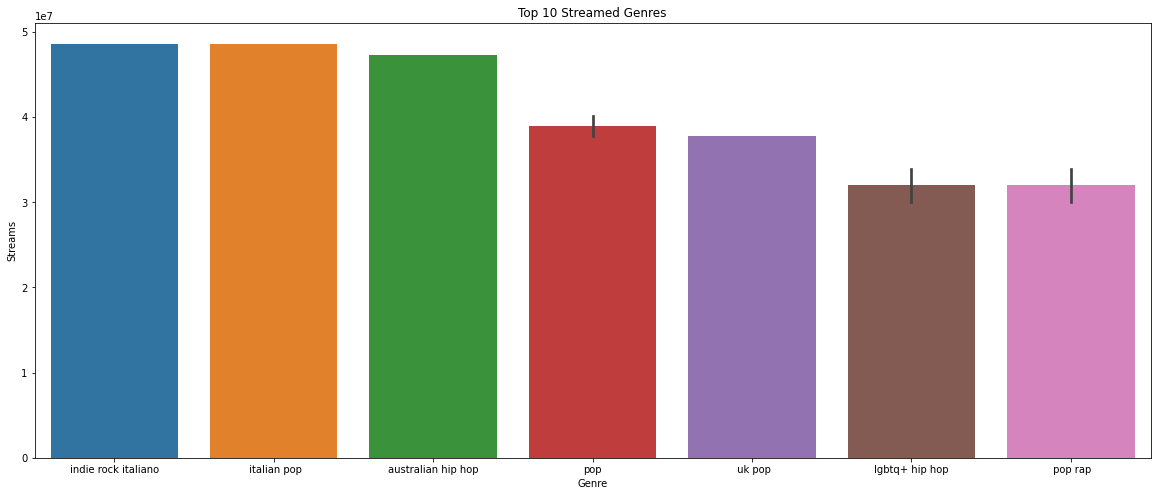

In [11]:
#Sorting by Streams
sort_streams=clean_spotify.sort_values(by=['Streams'],ascending=False)
#Plotting Barchart about top 10 Genres and their total Streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Streamed Genres")
sns.barplot(x='Genre',y='Streams',data=sort_streams.head(10))

<AxesSubplot:title={'center':'Top 10 Most Streamed Artists'}, xlabel='Artist', ylabel='Streams'>

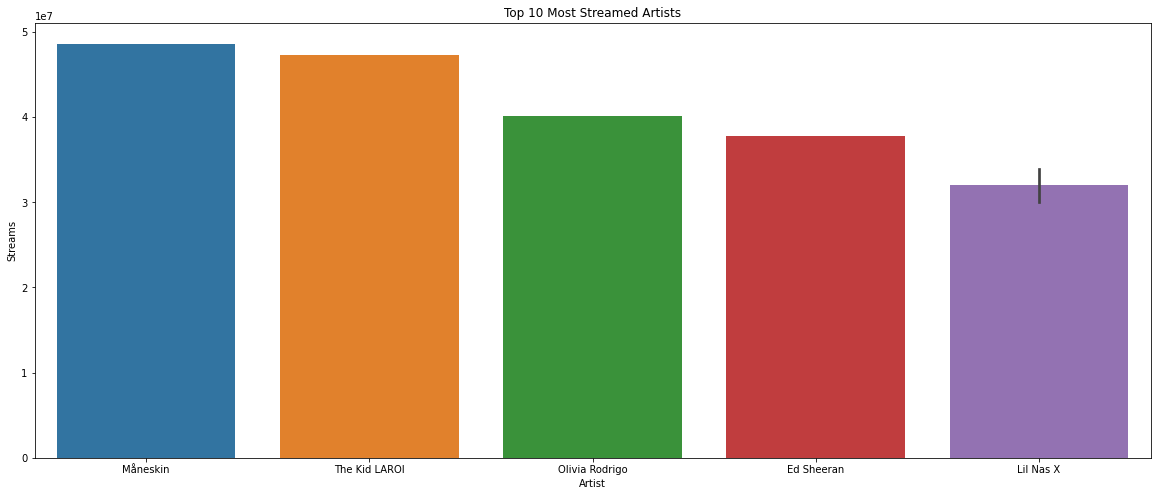

In [12]:
#Plotting Barchart about artist and their total streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Most Streamed Artists")
sns.barplot(x='Artist',y='Streams',data=sort_streams.head(10))

In [13]:
! pip install texthero

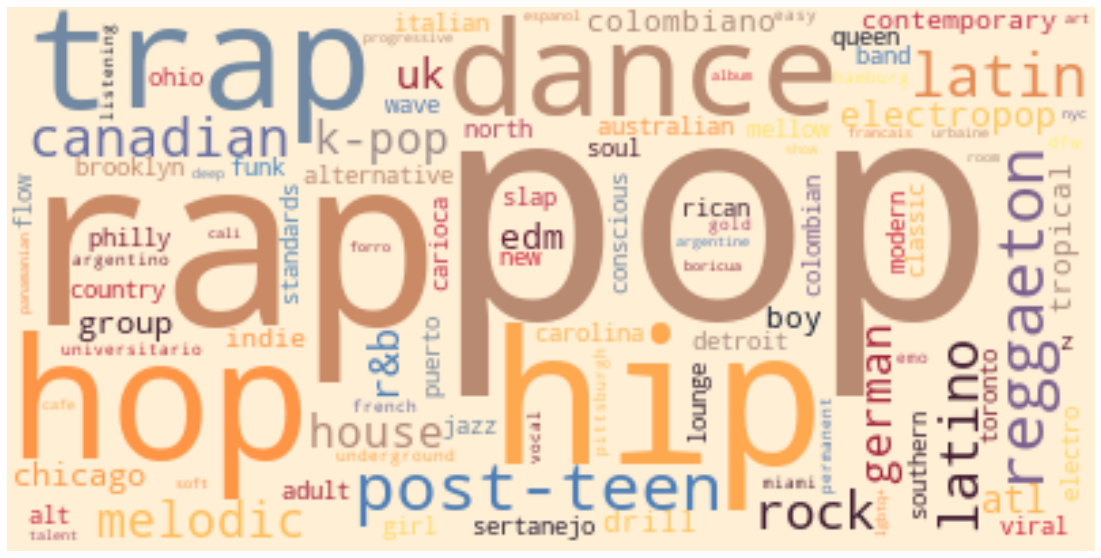

In [14]:
#Plot wordcloud image using WordCloud method
import texthero as hero
hero.wordcloud(clean_spotify.loc[:, 'Genre'], max_words=100)

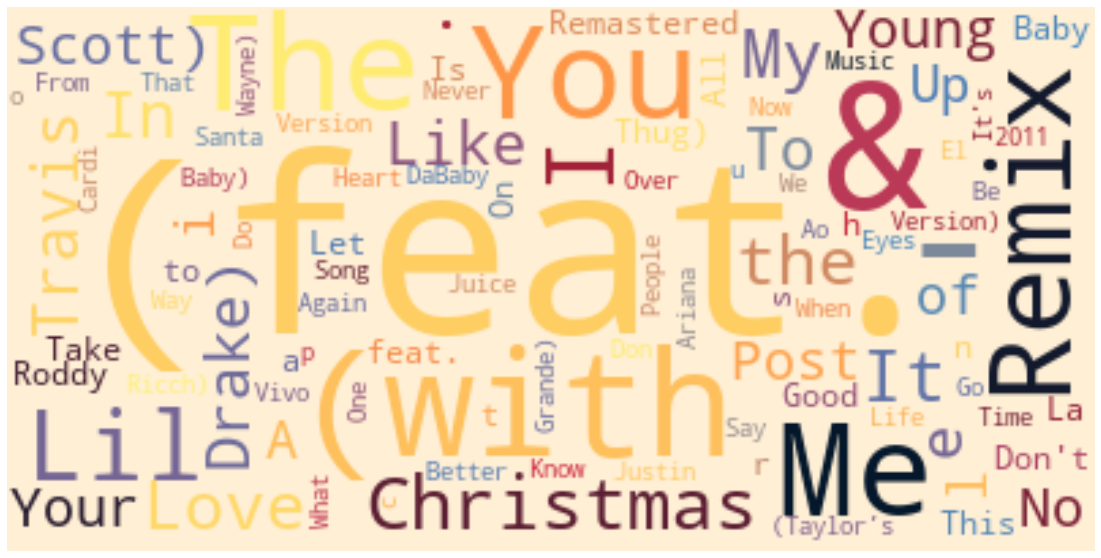

In [15]:
#Plot wordcloud image using WordCloud method
hero.wordcloud(clean_spotify.loc[:, 'Song Name'], max_words=100)

<AxesSubplot:>

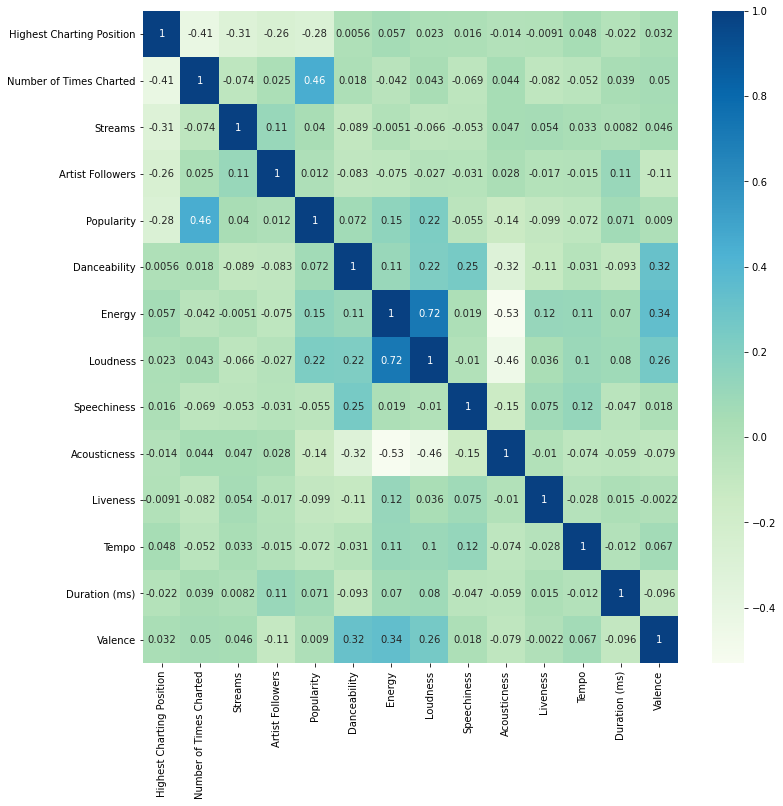

In [16]:
#Calculating Correlation
corr=clean_spotify.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

In [17]:
#Dropping the data columns 
cleaned_data= clean_spotify.drop(["Artist", "Song Name", "Release Date"], axis=1)
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762.0,indie rock italiano,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
0,1,8,48633449,3377762.0,italian pop,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
1,2,3,47248719,2230022.0,australian hip hop,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
2,1,11,40162559,6266514.0,pop,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
3,3,5,37799456,83293380.0,pop,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591


In [18]:
#Encoding Genre
genre_encoder = LabelEncoder()
cleaned_data['Genre'] = genre_encoder.fit_transform(cleaned_data['Genre'])
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762.0,341,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
0,1,8,48633449,3377762.0,78,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
1,2,3,47248719,2230022.0,252,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
2,1,11,40162559,6266514.0,379,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
3,3,5,37799456,83293380.0,379,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591


In [19]:
#spliting the data into training data and testing data
training_data, testing_data = train_test_split(cleaned_data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 3663
No. of testing examples: 916


,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
799,59,2,4865084,67208170.0,150,65.0,0.624,0.672,-5.334,0.1060,0.0967,0.155,159.852,146959.0,0.260
1465,191,4,4889500,5241145.0,143,79.0,0.889,0.496,-6.365,0.0905,0.2590,0.252,86.003,180522.0,0.544
438,139,1,5988511,2815928.0,160,72.0,0.880,0.577,-8.093,0.3020,0.0564,0.201,90.991,214440.0,0.740
1452,148,7,4836113,14103694.0,287,79.0,0.837,0.364,-11.713,0.2760,0.1490,0.271,123.984,213594.0,0.463
1201,68,1,8304928,56327031.0,273,60.0,0.410,0.820,-6.808,0.5330,0.2520,0.538,170.718,223124.0,0.526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,9,9,22405111,29051363.0,172,95.0,0.891,0.819,-3.964,0.1060,0.0261,0.173,101.968,217773.0,0.768
1461,183,1,5029979,2010879.0,400,56.0,0.642,0.669,-5.774,0.0486,0.3180,0.119,156.084,175067.0,0.227
1530,179,3,4831644,8153871.0,138,81.0,0.697,0.683,-2.881,0.1170,0.0372,0.137,96.133,186987.0,0.603
1127,30,9,4252898,20829526.0,176,72.0,0.754,0.583,-7.340,0.0432,0.3200,0.144,122.012,220051.0,0.770


In [20]:
#Dropping Stream Column From Test data
y_test=testing_data['Streams']
x_test=testing_data.drop('Streams', axis=1)
x_test.head()

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
799,59,2,67208170.0,150,65.0,0.624,0.672,-5.334,0.1060,0.0967,0.155,159.852,146959.0,0.260
1465,191,4,5241145.0,143,79.0,0.889,0.496,-6.365,0.0905,0.2590,0.252,86.003,180522.0,0.544
438,139,1,2815928.0,160,72.0,0.880,0.577,-8.093,0.3020,0.0564,0.201,90.991,214440.0,0.740
1452,148,7,14103694.0,287,79.0,0.837,0.364,-11.713,0.2760,0.1490,0.271,123.984,213594.0,0.463
1201,68,1,56327031.0,273,60.0,0.410,0.820,-6.808,0.5330,0.2520,0.538,170.718,223124.0,0.526


In [21]:
#Setting training data into x_train and y_train
x_train=training_data.drop('Streams',axis=1)
y_train=training_data['Streams']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, testing_data.shape

((3663, 14), (3663,), (916, 15))

In [22]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(x_test)
mae = np.mean(abs( linear_predict - y_test))
rmse = np.sqrt(np.mean((linear_predict - y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse) 

0.17451203285270234
Using Linear Regression, MAE is 1587366.34
Using Linear Regression, RMSE is 2846199.05


In [23]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(solver='lbfgs')

In [24]:
#Logistic Regression Modelling and Training
log_model = log_regression.fit(x_train, y_train)
print(log_model.score(x_train,y_train))


#testing the model and Displaying the output
log_predict=log_regression.predict(x_test)
mae = np.mean(abs( log_predict - y_test))
rmse = np.sqrt(np.mean((log_predict - y_test) ** 2))
print('Using Logestic Regression, MAE is %0.2f' %  mae)  
print('Using Logestic Regression, RMSE is %0.2f' %  rmse) 
print(accuracy_score(y_test, log_predict))

0.008736008736008737
Using Logestic Regression, MAE is 2134938.15
Using Logestic Regression, RMSE is 3648776.81
0.001091703056768559


/Users/meinv/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train,y_train)
dt_pred = dt_regressor.predict(x_test)
print(log_model.score(x_train,y_train))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,dt_pred))

0.008736008736008737
63284707141.161575


In [26]:
#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=1)
r_model.fit(x_train,y_train)


#Making predictions on test set 
r_predict=r_model.predict(x_test).astype(int)
print(r_model.score(x_train,y_train))
print(accuracy_score(y_test, r_predict))
mae = np.mean(abs( r_predict - y_test))
rmse = np.sqrt(np.mean((r_predict - y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse) 

0.9662868640638822
0.732532751091703
Using Linear Regression, MAE is 203043.08
Using Linear Regression, RMSE is 830446.86


In [27]:
#popularity prediction
#Dropping Stream Column From Test data
y_test_pop=testing_data['Popularity']
x_test_pop=testing_data.drop('Popularity', axis=1)
x_test_pop.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
799,59,2,4865084,67208170.0,150,0.624,0.672,-5.334,0.1060,0.0967,0.155,159.852,146959.0,0.260
1465,191,4,4889500,5241145.0,143,0.889,0.496,-6.365,0.0905,0.2590,0.252,86.003,180522.0,0.544
438,139,1,5988511,2815928.0,160,0.880,0.577,-8.093,0.3020,0.0564,0.201,90.991,214440.0,0.740
1452,148,7,4836113,14103694.0,287,0.837,0.364,-11.713,0.2760,0.1490,0.271,123.984,213594.0,0.463
1201,68,1,8304928,56327031.0,273,0.410,0.820,-6.808,0.5330,0.2520,0.538,170.718,223124.0,0.526


In [28]:
#Setting training data into x_train and y_train
x_train_pop=training_data.drop('Popularity',axis=1)
y_train_pop=training_data['Popularity']

#Shapes of x_train,y_train and test data
x_train_pop.shape, y_train_pop.shape, testing_data.shape

((3663, 14), (3663,), (916, 15))

In [29]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(x_train_pop,y_train_pop)
print(linear_model.score(x_train_pop,y_train_pop))

#testing the model and Displaying the output
linear_predict_pop=linear_model.predict(x_test_pop)
mae = np.mean(abs( linear_predict_pop - y_test_pop))
rmse = np.sqrt(np.mean((linear_predict_pop - y_test_pop) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse) 

0.29685634421138507
Using Linear Regression, MAE is 7.00
Using Linear Regression, RMSE is 9.24


In [30]:
#Logistic Regression Modelling and Training
log_model = log_regression.fit(x_train_pop, y_train_pop)
print(log_model.score(x_train_pop, y_train_pop))


#testing the model and Displaying the output
log_predict_pop=log_regression.predict(x_test_pop)
mae = np.mean(abs( log_predict_pop - y_test_pop))
rmse = np.sqrt(np.mean((log_predict_pop - y_test_pop) ** 2))
print('Using Logestic Regression, MAE is %0.2f' %  mae)  
print('Using Logestic Regression, RMSE is %0.2f' %  rmse) 
print(accuracy_score(y_test_pop, log_predict_pop))

0.0546000546000546
Using Logestic Regression, MAE is 9.65
Using Logestic Regression, RMSE is 13.46
0.04694323144104803


/Users/meinv/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=1)
r_model.fit(x_train_pop, y_train_pop)


#Making predictions on test set 
r_predict_pop=r_model.predict(x_test_pop).astype(int)
print(r_model.score(x_train_pop, y_train_pop))
print(accuracy_score(y_test_pop, r_predict_pop))
mae = np.mean(abs( r_predict_pop - y_test_pop))
rmse = np.sqrt(np.mean((r_predict_pop - y_test_pop) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse) 

0.9138524021771532
0.7456331877729258
Using Linear Regression, MAE is 2.03
Using Linear Regression, RMSE is 5.52
